In [1]:
!pip install shapely --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.7
    Uninstalling shapely-2.0.7:
      Successfully uninstalled shapely-2.0.7


In [2]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import transform
import pyproj
from shapely.geometry import mapping

In [3]:
polygon = gpd.GeoDataFrame({'geometry': gpd.GeoSeries([Polygon([(0,0),(0,1),(0,1),(1,0)])])})

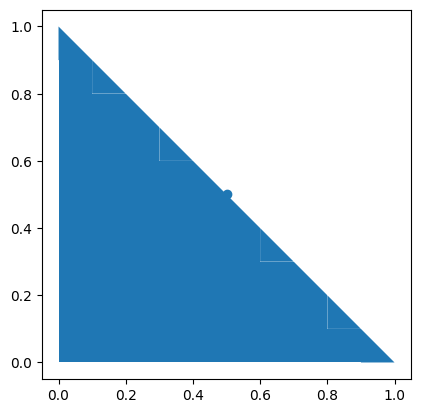

In [4]:
# Create a polygon
polygon = gpd.GeoDataFrame({'geometry': gpd.GeoSeries([Polygon([(0,0),(0,1),(0,1),(1,0)])])})

# Define a function to create a grid
def gridify(geom, cell_size):
    """
    Creates a grid of polygons within a given geometry.

    Args:
        geom (shapely.geometry.Polygon): The geometry to gridify.
        cell_size (float): The size of the grid cells.

    Returns:
        geopandas.GeoDataFrame: A GeoDataFrame containing the grid polygons.
    """
    # Get the bounds of the geometry
    minx, miny, maxx, maxy = geom.bounds

    # Create a list to store the grid polygons
    grid_cells = []

    # Iterate over the grid
    for x0 in np.arange(minx, maxx, cell_size):
        for y0 in np.arange(miny, maxy, cell_size):
            # Create a polygon for the current grid cell
            x1 = x0 + cell_size
            y1 = y0 + cell_size
            grid_cells.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

    # Create a GeoDataFrame from the grid polygons
    grid = gpd.GeoDataFrame({'geometry': grid_cells})

    # Clip the grid to the input geometry
    grid = gpd.clip(grid, geom)

    return grid

# Apply the gridify function
grid = gridify(polygon.geometry[0], cell_size=0.1)

# Plot the grid
grid.plot()
plt.show()

<Axes: >

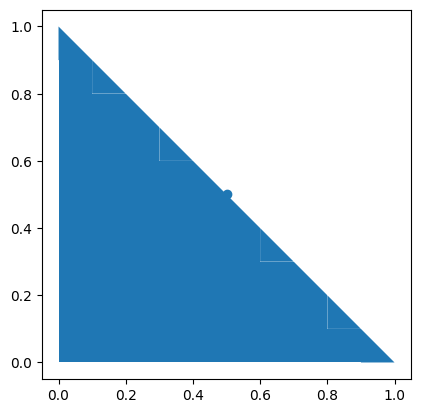

In [5]:
grid.plot()